<a href="https://colab.research.google.com/github/itsmeaby/Machine-Learning/blob/main/PyTorch_CV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer vision with convolutional neural network

# 0. Computer Vision Libraries in PyTorch

* `torchvision` (https://pytorch.org/vision/stable/index.html) - base domian library for computer vision in PyTorch.

* `torchvision.datasets` - get datasets and data loading functions for computer vision here

* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems

* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model (https://pytorch.org/vision/stable/transforms.html)

* `torch.utils.data.Dataset` -  Base dataset class for PyTorch.

* `torch.utils.data.Dataloader` - Creates a Python iterable over a dataset.

In [73]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 2.1.0 and torchvision version shouldn't be lower than 0.16
print(f"PyTorch version: {torch.__version__}\n torchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
 torchvision version: 0.16.0+cu121


## 1. getting a dataset

The dataset we'll be using is FasionMNIST from `torchvision.datasets`. (https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html)

In [74]:
# Setup trainig data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data",  # where to download the data
    train=True, # do we want training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),  # how do we want to transform data?
    target_transform=None  # how do we want to transform targets(labels)?
)

test_data = datasets.FashionMNIST(
    root = "data",  # where to download the data
    train=False, # do we want training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(),  # how do we want to transform data?
    target_transform=None  # how do we want to transform targets(labels)?
)

In [75]:
len(train_data), len(test_data)

(60000, 10000)

In [76]:
# See first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [77]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [78]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [79]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 check input and output shapes of data

In [80]:
# check the eshape of our image
print(f"Image shape: {image.shape} -> [colour_chennels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour_chennels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

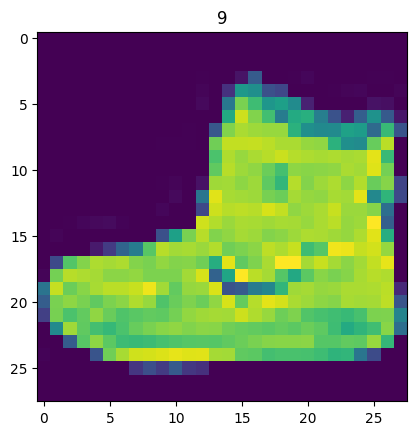

In [81]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
#image

Text(0.5, 1.0, 'Ankle boot')

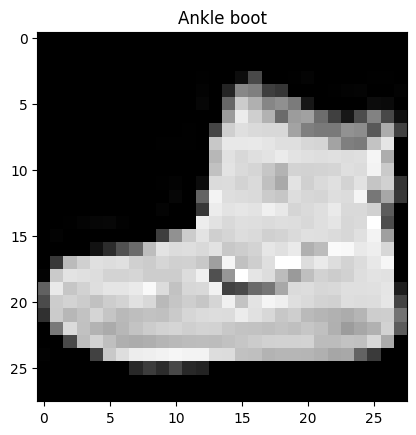

In [82]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

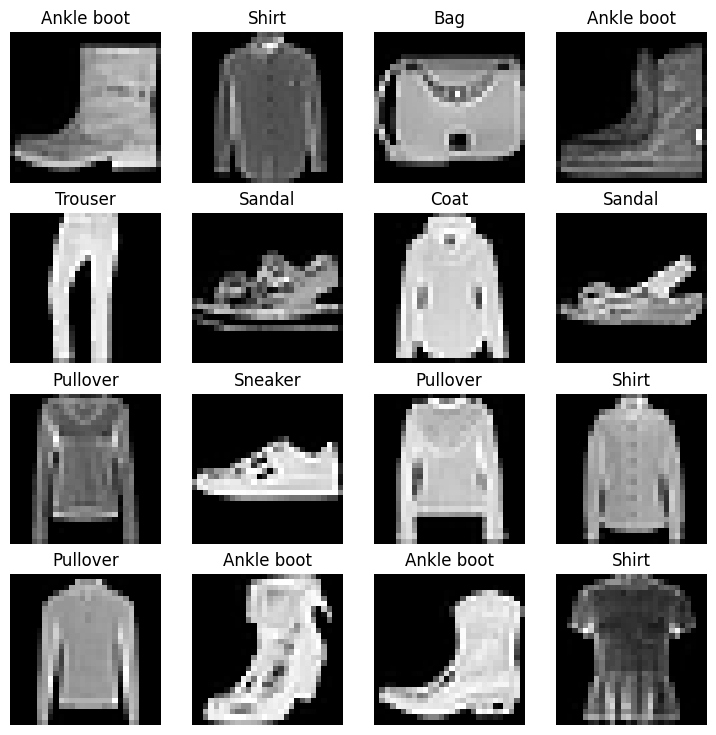

In [83]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

# 2. Prepare DataLoader

Right now the data is in the form of PyTorch Dataset.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches(Or mini-batches).

why would we do this?
1. It is more computaionally efficient, as in, our computer hardware may not be able to look (store in memory) at 60000 images in on hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [84]:
from torch.utils.data import DataLoader

# Setup the batch size pyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b1889aa0a30>, <torch.utils.data.dataloader.DataLoader object at 0x7b1889aa3940>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [85]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8 | Label size: torch.Size([])


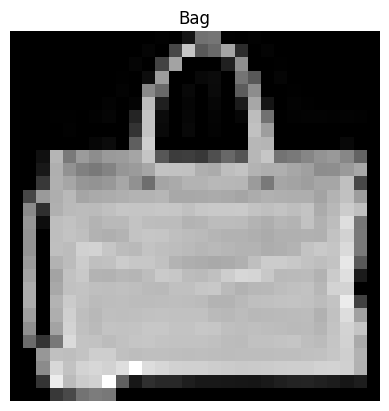

In [86]:
# Show a data sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label} | Label size: {label.shape}")

# 3. Model 0: Build a baseline model

when starting to build a series of machine learning modelling experiments, it's best practice to start with a base line model.

A baseline model is a model that we will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [87]:
# Create a flatten model
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# print out what happend
print(f"Shape before flattening: {x.shape} -> [colour_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [colour_channels, height, width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [colour_channels, height, width]


In [88]:
from torch import nn
class FashionMNISTModelv0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [89]:
# Manual seed
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelv0(
    input_shape=784,  # this is 28*28
    hidden_units = 10, # how many unites inthe hidden layer
    output_shape= len(class_names)  # one for every class
).to("cpu")

model_0

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [90]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [91]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss`.

* Optimizer - our optimizer `torch.optim.SGD()` ( stochaastic gradient descent)

* Evaluation matrix - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [92]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [93]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc).
2. how fast it runs.

In [94]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
  """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [95]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


6.205499994393904e-05

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform traning steps, claculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, claculate the test loss **per batch**.
4. Print out what's happening.
5. Time it all (for fun).

In [96]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs=3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----")
  ## Training
  train_loss = 0
  # Add a loop to oop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)
    # 2. Calculate the loss ( per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    # 3. optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss Backwards
    loss.backward()
    # 5. optimizer step
    optimizer.step()
    # print out what's happenin'
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  # Devide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():

    for X_test,y_test in test_dataloader:

      # 1. forward pass
      test_pred = model_0(X_test)

      #2. Calcualte loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # claculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n Train loss: {train_loss:.4f} | Test_loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5904 | Test_loss: 0.5095 | test acc: 82.0387
Epoch: 1 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4763 | Test_loss: 0.4799 | test acc: 83.1969
Epoch: 2 
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4550 | Test_loss: 0.4766 | test acc: 83.4265
Train time on cpu: 35.005 seconds


## 4. Make prediction and get model_0 results

In [97]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic code (for using gpu if there is one)

In [98]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [99]:
torch.cuda.is_available()

False

In [100]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6.  Model_1: Building a better model with non-linearity

In [101]:
# Create a model with non-linear and linear layers
class FashionMNISTModelv1(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [102]:
torch.manual_seed(42)
model_1 = FashionMNISTModelv1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

## 6.1 Setup loss, optimizer and evaluation metrics

In [103]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## 6.2 Functionizing training and test loops

Let's create function for
1. training loop - `train_step()`
2. testing loop - `test_step()`

In [104]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0
  model.to(device)
  # Put model into training mode
  model.train()
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
      # put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass ( outputs the raw logits from the model)
      y_pred = model(X)

      # 2. Calculate loss and accuracy (per batch)
      loss = loss_fn(y_pred, y)
      train_loss += loss # accumulate train loss
      train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [105]:
def test_step(data_loader: torch.utils.data.DataLoader,
            model: torch.nn.Module,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            device: torch.device = device):
  """ Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0
  model.to(device)
  # put model into evaluation mode
  model.eval()
  # Turn on inference context manager
  with torch.inference_mode():
      for X, y in data_loader:
          # Send data to target device(GPU if any otherwise cpu)
          X, y = X.to(device), y.to(device)

          # 1. Forward pass (outputs raw logits)
          test_pred = model(X)

          # 2. Calculate loss and accuracy
          test_loss += loss_fn(test_pred, y)
          test_acc += accuracy_fn(y_true=y,
              y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
          )

      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [106]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# Create a optimization and evaluation
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 35.535 seconds


> **Note** Sometimes, depending on our data/hardware we might find that our model trains faster on CPU than GPU.

> Why is this?
1. It could be that the overhead for copying data/model to and form the GPU outweighs the compute benefits offered by the GPU.
2. The hardware we're using has a better CPU in terms compute capability that the GPU.

> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [107]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device-agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [108]:
# Get model_1 results Dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [109]:
model_0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional neural network (CNN)

CNN's are also known COnvNets.

CNN's are know for thier capailities to find patterns in vishual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/


In [110]:
# Create a convolutional neural network
class FashionMNISTModelv3(nn.Module):
  """
    Model architecture that replicates the TinyVGG model from:
    https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv2d layer -> https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # Values we can set ourselves in our NN's are called hyperparameters.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        # Create a conv2d layer -> https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # Values we can set ourselves in our NN's are called hyperparameters.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,  # There's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(f"output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"output shape of classifier: {x.shape}")
    return x

In [111]:
image.shape

torch.Size([1, 28, 28])

In [112]:
torch.manual_seed(42)
model_2 = FashionMNISTModelv3(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [113]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## 7.1 Stepping through `nn.Conv2d`

See the doc: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [114]:
torch.manual_seed(42)
# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image shape:\n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image shape:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

      

In [115]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),  # Equivalent to kernel_size=3
                       stride=1,
                       padding=0)
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

## 7.2 Stepping through `nn.Maxpool2d()`

See the Doc: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [116]:
test_image.shape

torch.Size([3, 64, 64])

In [117]:
# Print out original image shape without unsqueezed dimention
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimention: {test_image.unsqueeze(0).shape}")
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")
# Pass data through MaxPool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and Max_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimention: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and Max_layer(): torch.Size([1, 10, 31, 31])


In [118]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimention to our image
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\n random tensor:\n {random_tensor}")
print(f"Shape before going through Max_layer(): {random_tensor.shape}")
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
# Pass random tensor through MaxPool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor:\n {max_pool_tensor}")
print(f"Shape after going through Max_layer(): {max_pool_tensor.shape}")


 random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape before going through Max_layer(): torch.Size([1, 1, 2, 2])

 Max pool tensor:
 tensor([[[[0.3367]]]])
Shape after going through Max_layer(): torch.Size([1, 1, 1, 1])


## 7.3 Setup a loss function and optimizer for model_2

In [119]:
# Setup loss funtion/eval metrices/optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

## 7.4 Training and testing `model_2` using our training and test functions

In [121]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.36475 | Train accuracy: 86.92%
Test loss: 0.35552 | Test accuracy: 87.03%

Train time on cpu: 54.811 seconds
Epoch: 1
---------
Train loss: 0.32651 | Train accuracy: 88.19%
Test loss: 0.33109 | Test accuracy: 87.47%

Train time on cpu: 112.518 seconds
Epoch: 2
---------
Train loss: 0.30717 | Train accuracy: 88.88%
Test loss: 0.31826 | Test accuracy: 88.52%

Train time on cpu: 167.482 seconds


In [123]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv3',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [124]:
model_0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [126]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelv0,0.476639,83.426518
1,FashionMNISTModelv1,0.685001,75.019968
2,FashionMNISTModelv3,0.318262,88.518371


In [127]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelv0,0.476639,83.426518,35.004860
1,FashionMNISTModelv1,0.685001,75.019968,35.534565
2,FashionMNISTModelv3,0.318262,88.518371,167.481543


Text(0, 0.5, 'model')

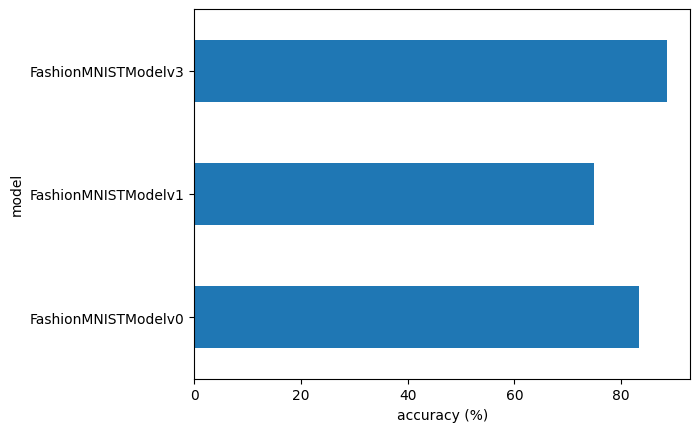

In [129]:
# Visualize our model reshults
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [130]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimention and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward padd (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      # Get pred_prob off hte GPU for fucther calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [131]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [157]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# VIew the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

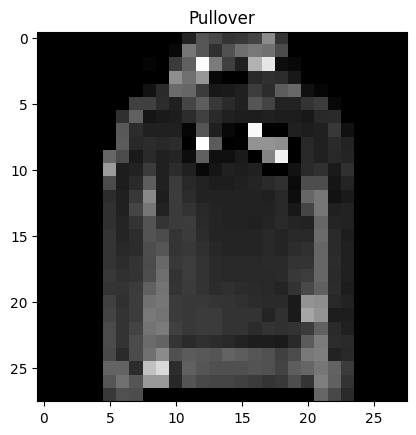

In [158]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [159]:
# Make predictions
pred_probs = make_prediction(model=model_2,
                              data=test_samples)
# View first two prediction probability
pred_probs[:2]

tensor([[2.7171e-02, 2.1696e-03, 5.3085e-01, 8.2753e-03, 3.2972e-01, 6.7293e-05,
         6.8921e-02, 8.9243e-05, 3.2652e-02, 9.3702e-05],
        [2.0699e-04, 8.3807e-06, 2.8909e-02, 1.0716e-04, 9.6505e-01, 2.3128e-07,
         3.1929e-03, 3.0786e-06, 2.5160e-03, 1.8148e-06]])

In [160]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

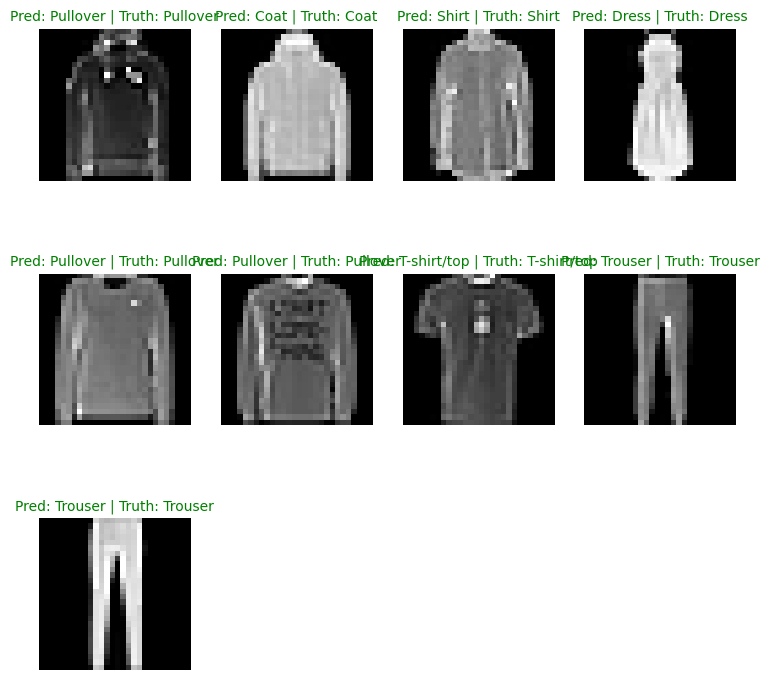

In [161]:

# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, cols, i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]
  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]
  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  # Check for equality between pred and truth and chaqnge color title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction isn't same as truth
  plt.axis(False)